In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.axes._axes import _log as matplotlib_axes_logger

In [2]:
matplotlib_axes_logger.setLevel('ERROR')

In [3]:
zero_one_colourmap = ListedColormap(('red', 'green'))

In [4]:
df = pd.read_excel('SVM_Data.xlsx')

df.head()

,X1,X2,Y
0,-0.364924,0.230728,1
1,-0.293515,-0.974130,0
2,0.470622,0.966409,0
3,-0.549030,0.869911,0
4,-1.072329,-0.195141,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      50 non-null     float64
 1   X2      50 non-null     float64
 2   Y       50 non-null     int64  
dtypes: float64(2), int64(1)
memory usage: 1.3 KB


In [6]:
zero_one_colourmap = ListedColormap(('red', 'green'))

### Plotting Decision Boundary Function

In [7]:
def plot_decision_boundary(X, y, clf):
  X_set, y_set = X, y
  X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, 
                                 stop = X_set[:, 0].max() + 1, 
                                 step = 0.01),
                       np.arange(start = X_set[:, 1].min() - 1, 
                                 stop = X_set[:, 1].max() + 1, 
                                 step = 0.01))
  
  plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(), 
                                             X2.ravel()]).T).reshape(X1.shape),
               alpha = 0.75, 
               cmap = zero_one_colourmap)
  plt.xlim(X1.min(), X1.max())
  plt.ylim(X2.min(), X2.max())
  for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = (zero_one_colourmap)(i), label = j)
  plt.title('SVM Decision Boundary')
  plt.xlabel('X1')
  plt.ylabel('X2')
  plt.legend()
  return plt.show()

### Plotting 3D Plot

In [8]:
def plot_3d_plot(X, y):
  r = np.exp(-(X ** 2).sum(1))
  ax = plt.subplot(projection='3d')
  ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=100, cmap=zero_one_colourmap)
  ax.set_xlabel('X1')
  ax.set_ylabel('X2')
  ax.set_zlabel('y')
  return ax

In [9]:
X = df.loc[:, ["X1", "X2"]].values
y = df.loc[:, "Y"].values

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Linear SVM

In [11]:
from sklearn.svm import LinearSVC

In [12]:
clf = LinearSVC()
clf.fit(X_train,y_train.ravel())
pred = clf.predict(X_test)

In [13]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [14]:
print(classification_report(y_test,pred))
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(accuracy_score(y_test,pred))
print('\n')

              precision    recall  f1-score   support

           0       1.00      0.09      0.17        11
           1       0.38      1.00      0.55         6

    accuracy                           0.41        17
   macro avg       0.69      0.55      0.36        17
weighted avg       0.78      0.41      0.30        17



[[ 1 10]
 [ 0  6]]


0.4117647058823529




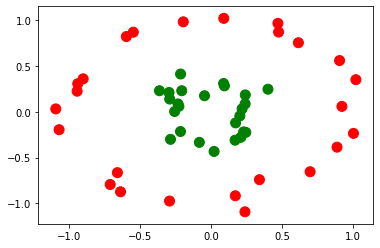

In [15]:
plt.scatter(X[:,0],X[:,1], c=y, s=100, cmap=zero_one_colourmap)
plt.show()

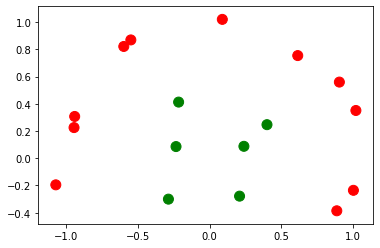

In [16]:
plt.scatter(X_test[:,0],X_test[:,1], c=y_test, s=100, cmap=zero_one_colourmap)
plt.show()

### Decision Boundary

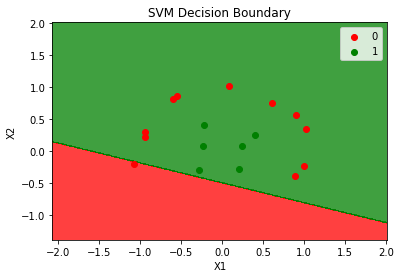

In [17]:
plot_decision_boundary(X_test, y_test, clf)

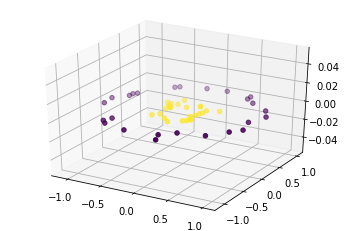

In [18]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['X1'],df['X2'],c=y)

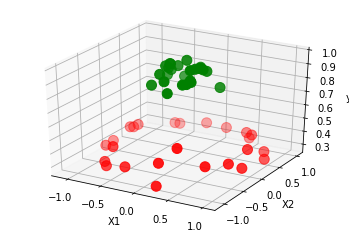

In [19]:
from mpl_toolkits import mplot3d
plot_3d_plot(X, y)


## SVM Kernel - rbf

In [20]:
from sklearn.svm import SVC

rbf_classifier = SVC(kernel="rbf")
rbf_classifier.fit(X_train, y_train.ravel())
y_pred = rbf_classifier.predict(X_test)

In [21]:
print(classification_report(y_test,y_pred))
print('\n')
print(confusion_matrix(y_test,y_pred))
print('\n')
print(accuracy_score(y_test,y_pred))
print('\n')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00         6

    accuracy                           1.00        17
   macro avg       1.00      1.00      1.00        17
weighted avg       1.00      1.00      1.00        17



[[11  0]
 [ 0  6]]


1.0




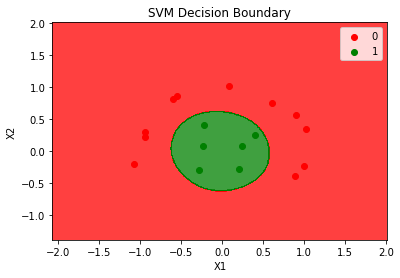

In [22]:
plot_decision_boundary(X_test, y_test, rbf_classifier)